### **Project overview.**

### **Business understanding.**

### **Objectives.**

### **Stakeholders.**

- End users (Consumers) - These are the individuals using the recommendation system to find movies to watch, such as subscribers to streaming platforms (e.g., Netflix, Amazon Prime Video).
- Content Providers (Movie Studios, Distributors) - Movie production companies, distributors, and streaming platforms that provide movies and other video content.
- Business Owners / Platform Providers (e.g., Netflix, Amazon Prime) - These are companies or platforms that host and manage the recommendation system as part of their streaming services.


## **Data Understanding.**

The MovieLens dataset contains:

- Users: Information about users who rate the movies.
- Movies: Details about the movies (e.g., titles, genres).
- Ratings: User ratings for each movie.
- Tags (optional): User-provided tags describing movies.

Common files include:

- links.csv: Contains movie ID, imdb ID and tmdb ID
- movies.csv: Contains movie ID, title, and genres.
- ratings.csv: Contains user ID, movie ID, rating, and timestamp.
- tags.csv: Contains user ID, movie ID, tag, and timestamp.

## **Data Preparation.**

### **Importing relevant libraries.**

In [230]:
# Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from surprise import Dataset, Reader, SVD
from surprise.model_selection import train_test_split
from surprise import accuracy

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

from sklearn.feature_extraction import DictVectorizer
# from fastFM import als

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MultiLabelBinarizer

from sklearn.preprocessing import MinMaxScaler

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

### **Loading dataset.**

In [189]:
# Loading datasets
links=pd.read_csv("Data/links.csv")
movies=pd.read_csv("Data/movies.csv")
ratings=pd.read_csv("Data/ratings.csv")
tags=pd.read_csv("Data/tags.csv")

In [190]:
links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [191]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [192]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [193]:
tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [194]:
links.shape

(9742, 3)

In [195]:
movies.shape

(9742, 3)

In [196]:
ratings.shape

(100836, 4)

In [197]:
tags.shape

(3683, 4)

In [198]:
links.columns

Index(['movieId', 'imdbId', 'tmdbId'], dtype='object')

In [199]:
movies.columns

Index(['movieId', 'title', 'genres'], dtype='object')

In [200]:
ratings.columns

Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')

In [201]:
tags.columns

Index(['userId', 'movieId', 'tag', 'timestamp'], dtype='object')

In [202]:
links.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  9742 non-null   int64  
 1   imdbId   9742 non-null   int64  
 2   tmdbId   9734 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 228.5 KB


In [203]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [204]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [205]:
tags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   userId     3683 non-null   int64 
 1   movieId    3683 non-null   int64 
 2   tag        3683 non-null   object
 3   timestamp  3683 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 115.2+ KB


In [206]:
links.describe()

,movieId,imdbId,tmdbId
count,9742.000000,9.742000e+03,9734.000000
mean,42200.353623,6.771839e+05,55162.123793
std,52160.494854,1.107228e+06,93653.481487
min,1.000000,4.170000e+02,2.000000
25%,3248.250000,9.518075e+04,9665.500000
50%,7300.000000,1.672605e+05,16529.000000
75%,76232.000000,8.055685e+05,44205.750000
max,193609.000000,8.391976e+06,525662.000000


In [207]:
movies.describe()

,movieId
count,9742.000000
mean,42200.353623
std,52160.494854
min,1.000000
25%,3248.250000
50%,7300.000000
75%,76232.000000
max,193609.000000


In [208]:
ratings.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


In [209]:
tags.describe()

,userId,movieId,timestamp
count,3683.000000,3683.000000,3.683000e+03
mean,431.149335,27252.013576,1.320032e+09
std,158.472553,43490.558803,1.721025e+08
min,2.000000,1.000000,1.137179e+09
25%,424.000000,1262.500000,1.137521e+09
50%,474.000000,4454.000000,1.269833e+09
75%,477.000000,39263.000000,1.498457e+09
max,610.000000,193565.000000,1.537099e+09


### **Checking for null values**

In [210]:
links.isnull().sum()

movieId    0
imdbId     0
tmdbId     8
dtype: int64

In [211]:
movies.isnull().sum()

movieId    0
title      0
genres     0
dtype: int64

In [212]:
ratings.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [213]:
tags.isnull().sum()

userId       0
movieId      0
tag          0
timestamp    0
dtype: int64

### **Data type conversion**

In [214]:
ratings['userId'] = ratings['userId'].astype(int)
ratings['movieId'] = ratings['movieId'].astype(int)
ratings['rating'] = ratings['rating'].astype(float)

tags['userId'] = tags['userId'].astype(int)

In [215]:
ratings['timestamp'] = pd.to_datetime(ratings['timestamp'], unit='s')
tags['timestamp'] = pd.to_datetime(tags['timestamp'], unit='s')

### **Merge Datasets (Data Integration)**

In [216]:
movie_ratings = pd.merge(ratings, movies, on='movieId', how='left')

movie_ratings.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,2000-07-30 18:45:03,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,2000-07-30 18:20:47,Grumpier Old Men (1995),Comedy|Romance
2,1,6,4.0,2000-07-30 18:37:04,Heat (1995),Action|Crime|Thriller
3,1,47,5.0,2000-07-30 19:03:35,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,5.0,2000-07-30 18:48:51,"Usual Suspects, The (1995)",Crime|Mystery|Thriller


In [217]:
tags_movie_ratings = pd.merge(movie_ratings, tags, on='userId', how='left')

tags_movie_ratings.head()

,userId,movieId_x,rating,timestamp_x,title,genres,movieId_y,tag,timestamp_y
0,1,1,4.0,2000-07-30 18:45:03,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,NaN,NaN,NaT
1,1,3,4.0,2000-07-30 18:20:47,Grumpier Old Men (1995),Comedy|Romance,NaN,NaN,NaT
2,1,6,4.0,2000-07-30 18:37:04,Heat (1995),Action|Crime|Thriller,NaN,NaN,NaT
3,1,47,5.0,2000-07-30 19:03:35,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,NaN,NaN,NaT
4,1,50,5.0,2000-07-30 18:48:51,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,NaN,NaN,NaT


## **Data Visualization.**

### 1. **Distribution of Ratings:**
**Purpose:**

The goal here is to understand the overall rating behavior of users. 

How do people generally rate movies? 

Are they more inclined to give higher ratings (e.g., 4-5 stars), or are lower ratings (e.g., 1-2 stars) more common?


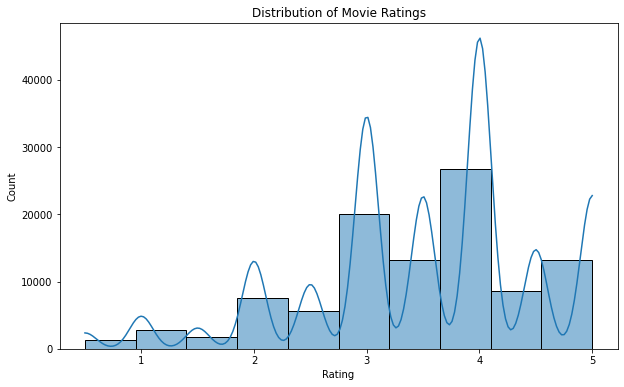

In [218]:
# Plot histogram
plt.figure(figsize=(10,6))
sns.histplot(ratings['rating'], bins=10, kde=True)
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

As it can be seen by the above visualization, the **Kernel Density Estimate (KDE)** curve is skewed towards the right or the higher end, that is, between 3-5 suggesting that users tends to rate positively.

 ### 2. **Top-Rated Movies:**
**Purpose:**

This visualization showcases the movies that have the highest average rating, indicating which movies are most appreciated by users.

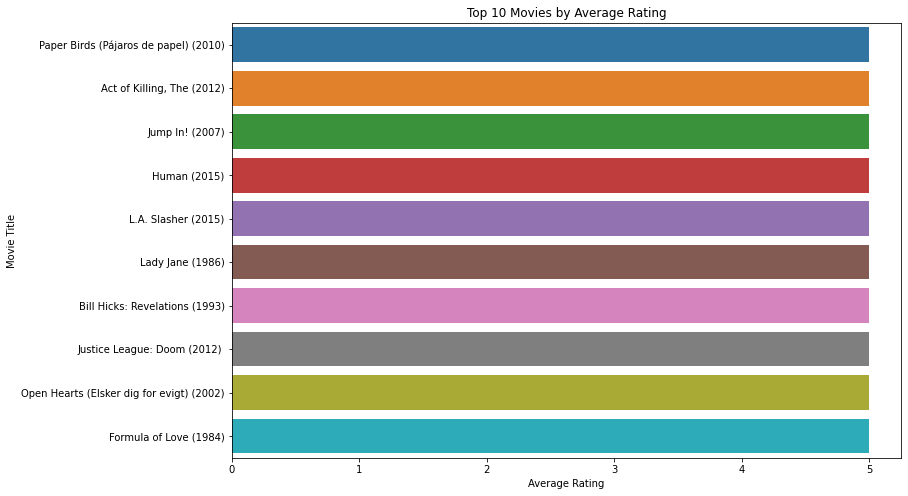

In [219]:
avg_ratings = ratings.groupby('movieId')['rating'].mean().reset_index()

# Merge movies and ratings
movie_ratings = pd.merge(avg_ratings, movies, on='movieId')
top_rated = movie_ratings.sort_values(by='rating', ascending=False).head(10)

# Bar plot for top-rated movies
plt.figure(figsize=(12, 8))
sns.barplot(x='rating', y='title', data=top_rated)
plt.title('Top 10 Movies by Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Movie Title')
plt.show()

### 3. **Number of Ratings per Movie:**
**Purpose:**

This visualization shows the popularity of movies based on how many times they've been rated. 

It answers the question: "Which movies are being rated the most often?"

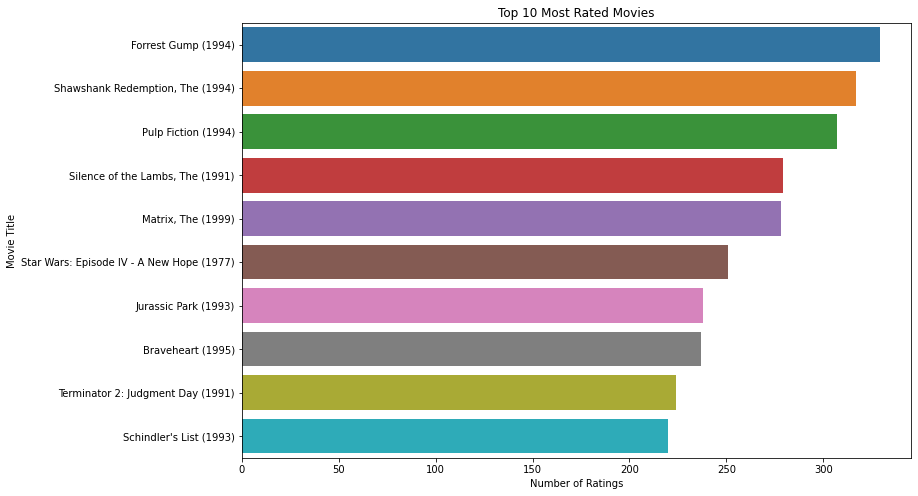

In [220]:
rating_counts = ratings.groupby('movieId')['rating'].count().reset_index()
movie_rating_counts = pd.merge(rating_counts, movies, on='movieId')
popular_movies = movie_rating_counts.sort_values(by='rating', ascending=False).head(10)

# Bar plot for most rated movies
plt.figure(figsize=(12, 8))
sns.barplot(x='rating', y='title', data=popular_movies)
plt.title('Top 10 Most Rated Movies')
plt.xlabel('Number of Ratings')
plt.ylabel('Movie Title')
plt.show()

### 4. **Genres Analysis:**
**Purpose:**

This visualization helps in understanding the distribution of movies across different genres. 

It tells us which genres are more prominent in the dataset.

By splitting the genre strings, we can count the frequency of each genre and use a bar chart to visualize it.

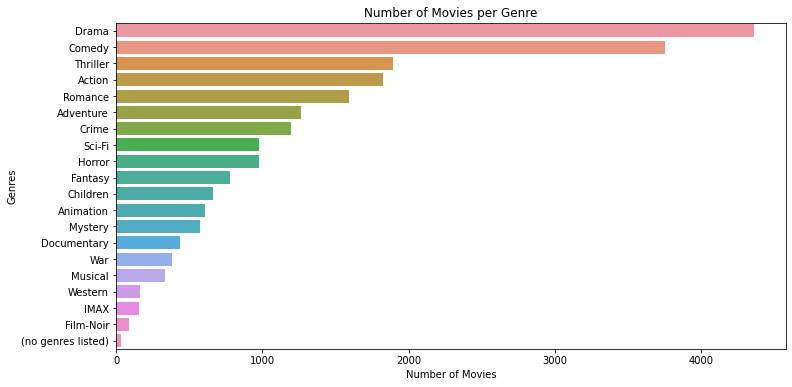

In [221]:
# Split genres and count
movies['genres'] = movies['genres'].str.split('|')
all_genres = movies.explode('genres')

genre_counts = all_genres['genres'].value_counts()

# Bar plot for genres
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_counts.values, y=genre_counts.index)
plt.title('Number of Movies per Genre')
plt.xlabel('Number of Movies')
plt.ylabel('Genres')
plt.show()

### 5. **Heatmap of Ratings by User and Movie:**
**Purpose:**

The heatmap visualizes the relationship between users and the movies they have rated.

It can give a sense of how users interact with different movies.

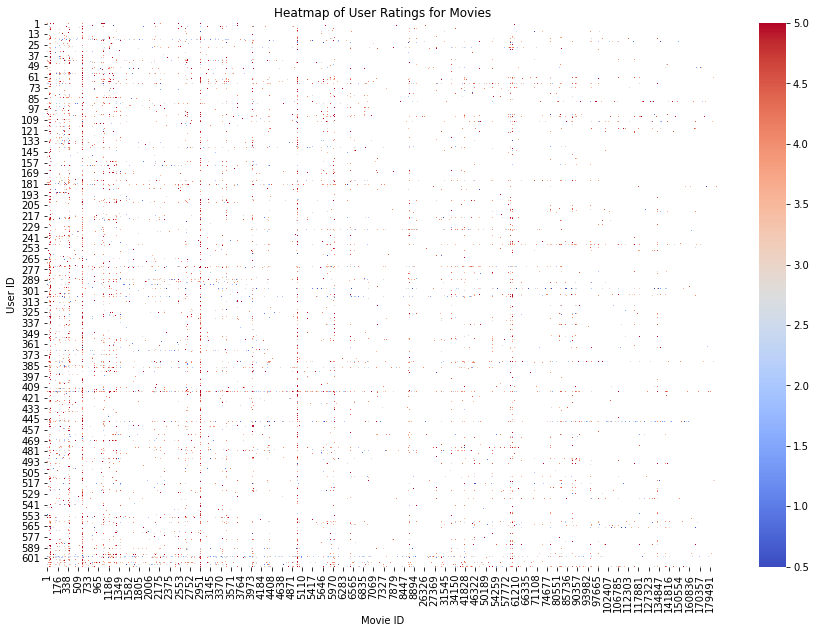

In [222]:
user_movie_matrix = ratings.pivot_table(index='userId', columns='movieId', values='rating')

plt.figure(figsize=(15, 10))
sns.heatmap(user_movie_matrix, cmap='coolwarm', cbar=True)
plt.title('Heatmap of User Ratings for Movies')
plt.xlabel('Movie ID')
plt.ylabel('User ID')
plt.show()

### 6. **Time-based Analysis of Ratings:**
**Purpose:**

This visualization tracks how user ratings change over time. 

It's helpful for spotting trends, such as whether ratings for certain movies or genres are rising or falling in popularity.

- We convert the timestamp into a year and then calculate the average rating per year.
- A line plot is used here to track the evolution of average ratings over time.

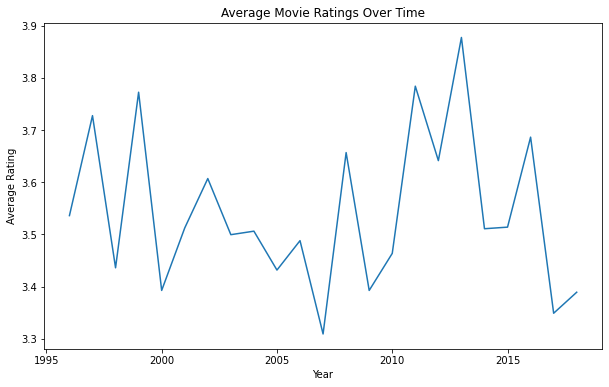

In [223]:
# Convert timestamp to datetime
ratings['timestamp'] = pd.to_datetime(ratings['timestamp'], unit='s')
ratings['year'] = ratings['timestamp'].dt.year

yearly_ratings = ratings.groupby('year')['rating'].mean().reset_index()

# Line plot for average rating per year
plt.figure(figsize=(10, 6))
sns.lineplot(x='year', y='rating', data=yearly_ratings)
plt.title('Average Movie Ratings Over Time')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.show()

## **Building a Recommendation System.**

There are various ways to build a recommendation system.

Common approaches are:
1. Collaborative filtering
2. Content-based filtering
3. Hybrid approaches

### 1. **Collaborative Filtering**
- User-based filtering: Recommend movies based on users with similar preferences.
- Item-based filtering: Recommend movies similar to those that the user liked in the past.

For this, you can use libraries like surprise, which is great for collaborative filtering:

In [232]:
from surprise.model_selection import train_test_split

# Load data into Surprise format
reader = Reader(rating_scale=(0.5, 5.0))
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)

# Train-test split
trainset, testset = train_test_split(data, test_size=0.25)

# Use Singular Value Decomposition (SVD) for collaborative filtering
algo = SVD()
algo.fit(trainset)
predictions = algo.test(testset)

# Evaluate the accuracy
accuracy.rmse(predictions)

RMSE: 0.8838


0.8838191037088257

### 2. **Content-based filtering**
This method recommends movies based on their similarity (e.g., genre or description).

In [235]:
# Using TF-IDF to compute similarity based on movie genres
movies['genres'] = movies['genres'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)

# Vectorize genres
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(movies['genres'])

# Compute similarity
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

# Function to get movie recommendations based on similarity score
def get_recommendations(title, cosine_sim=cosine_sim):
    idx = movies[movies['title'] == title].index[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]  # Get top 10
    movie_indices = [i[0] for i in sim_scores]
    return movies['title'].iloc[movie_indices]

# Get recommendations for a specific movie
recommendations = get_recommendations('Toy Story (1995)')
print(recommendations)

1706                                          Antz (1998)
2355                                   Toy Story 2 (1999)
2809       Adventures of Rocky and Bullwinkle, The (2000)
3000                     Emperor's New Groove, The (2000)
3568                                Monsters, Inc. (2001)
6194                                     Wild, The (2006)
6486                               Shrek the Third (2007)
6948                       Tale of Despereaux, The (2008)
7760    Asterix and the Vikings (Astérix et les Viking...
8219                                         Turbo (2013)
Name: title, dtype: object


### 3. **Hybrid Approaches**
You can also combine collaborative and content-based filtering for a hybrid model to take advantage of both methods.

In [236]:
# Merge ratings and movies on movieId
df = pd.merge(ratings, movies, on='movieId')

In [237]:
# Load data into Surprise format
reader = Reader(rating_scale=(0.5, 5.0))
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)

# Train-test split
trainset, testset = train_test_split(data, test_size=0.25)

# Use Singular Value Decomposition (SVD) for collaborative filtering
algo = SVD()
algo.fit(trainset)

# Predict ratings for testset (userId, movieId pairs)
collab_predictions = algo.test(testset)

In [238]:
# Create a TF-IDF vectorizer for genres
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(movies['genres'])

# Compute cosine similarity matrix between movies based on their genres
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

# Function to get movie recommendations based on genre similarity
def get_content_recommendations(movie_title, cosine_sim=cosine_sim):
    idx = movies[movies['title'] == movie_title].index[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]  # Get top 10 similar movies
    movie_indices = [i[0] for i in sim_scores]
    return movies['title'].iloc[movie_indices]

# Example content-based recommendations for 'Toy Story (1995)'
content_recommendations = get_content_recommendations('Toy Story (1995)')
print(content_recommendations)

1706                                          Antz (1998)
2355                                   Toy Story 2 (1999)
2809       Adventures of Rocky and Bullwinkle, The (2000)
3000                     Emperor's New Groove, The (2000)
3568                                Monsters, Inc. (2001)
6194                                     Wild, The (2006)
6486                               Shrek the Third (2007)
6948                       Tale of Despereaux, The (2008)
7760    Asterix and the Vikings (Astérix et les Viking...
8219                                         Turbo (2013)
Name: title, dtype: object


Here’s an example of combining the results by weighted averaging:

#### **Combining Predictions:**

In [239]:
# Assume you have a user and movie to recommend for
user_id = 1
movie_title = 'Toy Story (1995)'
movie_idx = movies[movies['title'] == movie_title].index[0]

# Get content-based recommendations for a given movie
content_recs = get_content_recommendations(movie_title)

# Predict rating using collaborative filtering
movie_id = movies.loc[movie_idx, 'movieId']
collab_pred = algo.predict(user_id, movie_id).est

# Assume we assign a weight to each component
collab_weight = 0.7
content_weight = 0.3

# Hybrid score: weighted average of collaborative and content-based score
# For simplicity, using 5.0 as the max score in content-based ranking
content_sim_score = cosine_sim[movie_idx].mean() * 5.0
hybrid_score = collab_weight * collab_pred + content_weight * content_sim_score

print(f'Collaborative score: {collab_pred}')
print(f'Content-based similarity score: {content_sim_score}')
print(f'Hybrid score: {hybrid_score}')

Collaborative score: 4.393645682119752
Content-based similarity score: 0.7930704004199247
Hybrid score: 3.3134730976098035


 ### **Fine-Tuning and Evaluation**

You can tune the weights (collab_weight and content_weight) to optimize performance. Typically, you’ll evaluate the hybrid system using metrics like **Root Mean Squared Error (RMSE)** for ratings prediction or **Precision** and **Recall** for top-N recommendations.

In [240]:
# Test collaborative filtering performance
collab_rmse = accuracy.rmse(collab_predictions)

# You can also create custom evaluation metrics for the hybrid model

RMSE: 0.8740


### **Handling cold start problems**

In [241]:
# Recommend the top 10 most-rated and highly rated movies
popular_movies = ratings.groupby('movieId').size().sort_values(ascending=False).head(10)
popular_recommendations = movies.loc[movies['movieId'].isin(popular_movies.index)]
print(popular_recommendations[['title']])

                                          title
97                            Braveheart (1995)
224   Star Wars: Episode IV - A New Hope (1977)
257                         Pulp Fiction (1994)
277            Shawshank Redemption, The (1994)
314                         Forrest Gump (1994)
418                        Jurassic Park (1993)
461                     Schindler's List (1993)
507           Terminator 2: Judgment Day (1991)
510            Silence of the Lambs, The (1991)
1939                         Matrix, The (1999)


### **Implementing cold start for new users**

In [242]:
def cold_start_user_recommendations(user_id, new_user_genre_preference=None):
    """
    Recommends movies for cold-start users.
    If new_user_genre_preference is provided, use content-based filtering.
    If no preferences, use popularity-based recommendations.
    """
    if new_user_genre_preference:
        # Content-based filtering based on genre preferences
        genre_movies = movies[movies['genres'].str.contains(new_user_genre_preference, na=False)]
        top_genre_movies = genre_movies.sort_values(by='movieId').head(10)
        return top_genre_movies[['title']]
    else:
        # Popularity-based recommendations for cold-start users
        popular_movies = ratings.groupby('movieId').size().sort_values(ascending=False).head(10)
        return movies[movies['movieId'].isin(popular_movies.index)][['title']]

# Example call for cold-start user who likes 'Comedy'
recommendations = cold_start_user_recommendations(user_id=100, new_user_genre_preference='Comedy')
print(recommendations)

                                    title
0                        Toy Story (1995)
2                 Grumpier Old Men (1995)
3                Waiting to Exhale (1995)
4      Father of the Bride Part II (1995)
6                          Sabrina (1995)
10         American President, The (1995)
11     Dracula: Dead and Loving It (1995)
17                      Four Rooms (1995)
18  Ace Ventura: When Nature Calls (1995)
19                     Money Train (1995)
